Python_ver : 3.11.7

In [3]:
import pandas as pd
from prophet import Prophet

In [ ]:
# df_power = pd.read_csv('https://www.tepco.co.jp/forecast/html/images/juyo-2017.csv', encoding='shift_jis', skiprows=1)
# print(df_power.head())
# print(df_power.shape)

       DATE  TIME  実績(万kW)
0  2017/1/1  0:00     2783
1  2017/1/1  1:00     2634
2  2017/1/1  2:00     2520
3  2017/1/1  3:00     2438
4  2017/1/1  4:00     2389
(8760, 3)


In [36]:
years = [2017, 2018, 2019]

df_power = pd.DataFrame()
for year in years:
    print(f'Processing data for year: {year}')
    _df = pd.read_csv(f'https://www.tepco.co.jp/forecast/html/images/juyo-{year}.csv', encoding='shift_jis', skiprows=1)
    df_power = pd.concat([df_power, _df], axis=0, ignore_index=True)

print(df_power.head())
print(df_power.tail())


Processing data for year: 2017
Processing data for year: 2018
Processing data for year: 2019
       DATE  TIME  実績(万kW)
0  2017/1/1  0:00     2783
1  2017/1/1  1:00     2634
2  2017/1/1  2:00     2520
3  2017/1/1  3:00     2438
4  2017/1/1  4:00     2389
             DATE   TIME  実績(万kW)
26275  2019/12/31  19:00     3302
26276  2019/12/31  20:00     3263
26277  2019/12/31  21:00     3182
26278  2019/12/31  22:00     3077
26279  2019/12/31  23:00     3029


In [37]:
df_power.shape

(26280, 3)

In [38]:
df_power['DATE'][0]
print(df_power['DATE'][0])

2017/1/1


In [39]:
from datetime import datetime as dt

In [47]:
datetimes  =[]

for _, datum in df_power.iterrows():
    date = datum['DATE']
    time = datum['TIME']
    str_datetime = f'{date} {time}'
    datetime = dt.strptime(str_datetime, '%Y/%m/%d %H:%M')
    datetimes.append(datetime)

datetimes[0]

datetime.datetime(2017, 1, 1, 0, 0)

In [ ]:
#ds→datestampの略
#y→予測したい値
df_power['ds'] = datetimes
df_power.rename(columns={'実績(万kW)': 'y'}, inplace=True)
print(df_power)

             DATE   TIME     y                  ds
0        2017/1/1   0:00  2783 2017-01-01 00:00:00
1        2017/1/1   1:00  2634 2017-01-01 01:00:00
2        2017/1/1   2:00  2520 2017-01-01 02:00:00
3        2017/1/1   3:00  2438 2017-01-01 03:00:00
4        2017/1/1   4:00  2389 2017-01-01 04:00:00
...           ...    ...   ...                 ...
26275  2019/12/31  19:00  3302 2019-12-31 19:00:00
26276  2019/12/31  20:00  3263 2019-12-31 20:00:00
26277  2019/12/31  21:00  3182 2019-12-31 21:00:00
26278  2019/12/31  22:00  3077 2019-12-31 22:00:00
26279  2019/12/31  23:00  3029 2019-12-31 23:00:00

[26280 rows x 4 columns]


In [ ]:
model = Prophet()
model.fit(df_power)

01:58:21 - cmdstanpy - INFO - Chain [1] start processing
01:58:27 - cmdstanpy - INFO - Chain [1] done processing


                       ds
0     2017-01-01 00:00:00
1     2017-01-01 01:00:00
2     2017-01-01 02:00:00
3     2017-01-01 03:00:00
4     2017-01-01 04:00:00
...                   ...
35059 2020-12-31 19:00:00
35060 2020-12-31 20:00:00
35061 2020-12-31 21:00:00
35062 2020-12-31 22:00:00
35063 2020-12-31 23:00:00

[35064 rows x 1 columns]


/Users/kaisei/MyHobby/power_forecasting/.venv/lib/python3.11/site-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [61]:
future = model.make_future_dataframe(24*366, freq='H', include_history=True)
print(future.tail(24))  # 将来24時間分の時刻のみ

                       ds
35040 2020-12-31 00:00:00
35041 2020-12-31 01:00:00
35042 2020-12-31 02:00:00
35043 2020-12-31 03:00:00
35044 2020-12-31 04:00:00
35045 2020-12-31 05:00:00
35046 2020-12-31 06:00:00
35047 2020-12-31 07:00:00
35048 2020-12-31 08:00:00
35049 2020-12-31 09:00:00
35050 2020-12-31 10:00:00
35051 2020-12-31 11:00:00
35052 2020-12-31 12:00:00
35053 2020-12-31 13:00:00
35054 2020-12-31 14:00:00
35055 2020-12-31 15:00:00
35056 2020-12-31 16:00:00
35057 2020-12-31 17:00:00
35058 2020-12-31 18:00:00
35059 2020-12-31 19:00:00
35060 2020-12-31 20:00:00
35061 2020-12-31 21:00:00
35062 2020-12-31 22:00:00
35063 2020-12-31 23:00:00


/Users/kaisei/MyHobby/power_forecasting/.venv/lib/python3.11/site-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [63]:
forecast = model.predict(future)

In [64]:
import matplotlib.pyplot as plt

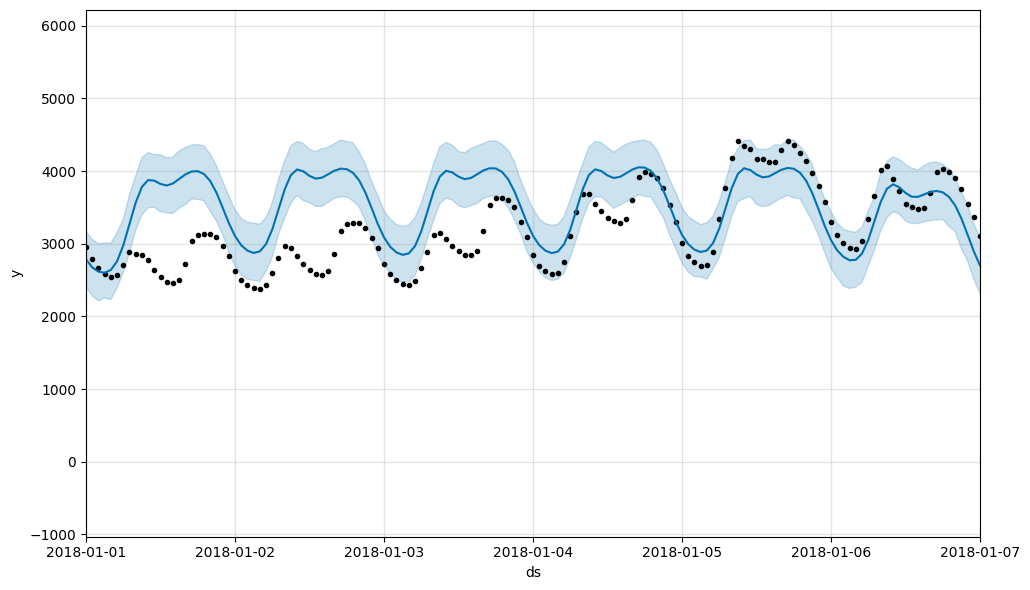

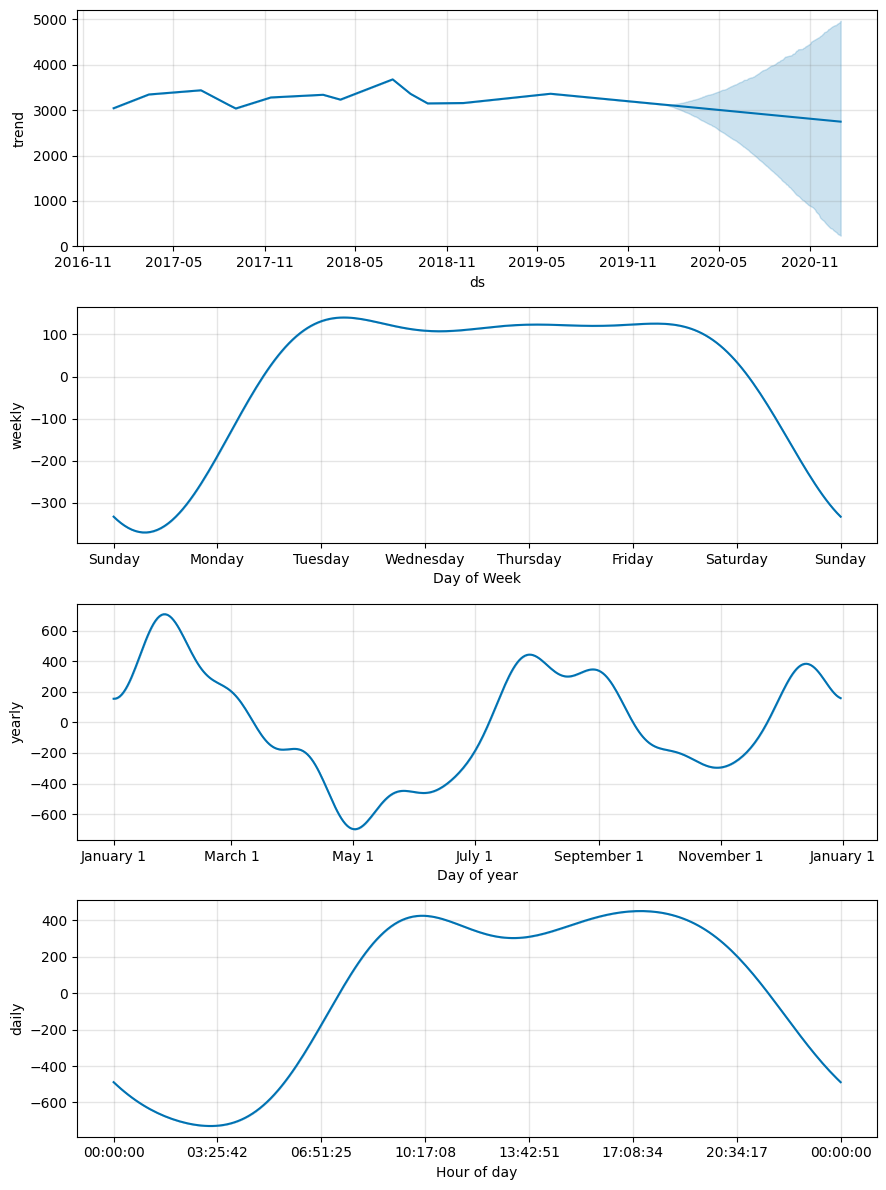

In [101]:
model.plot(forecast)
plt.xlim(dt(2018, 1, 1), dt(2018, 1, 7))
model.plot_components(forecast)
plt.show()

In [86]:
df_2020 = pd.read_csv('https://www.tepco.co.jp/forecast/html/images/juyo-2020.csv', encoding='shift_jis', skiprows=1)
df_2020.head()

,DATE,TIME,実績(万kW)
0,2020/1/1,0:00,2857
1,2020/1/1,1:00,2703
2,2020/1/1,2:00,2602
3,2020/1/1,3:00,2520
4,2020/1/1,4:00,2464


In [87]:
forecast2020 = forecast[forecast['ds'] >= dt(2020, 1, 1)].reset_index(drop=True)
print(forecast2020.head())

                   ds        trend   yhat_lower   yhat_upper  trend_lower  \
0 2020-01-01 00:00:00  3131.715577  2520.411509  3293.551997  3131.715577   
1 2020-01-01 01:00:00  3131.671651  2365.662372  3177.849109  3131.671651   
2 2020-01-01 02:00:00  3131.627725  2304.392860  3093.819169  3131.627725   
3 2020-01-01 03:00:00  3131.583799  2293.165135  3045.546612  3131.583799   
4 2020-01-01 04:00:00  3131.539873  2300.922049  3065.480393  3131.539873   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  3131.715577     -223.528583           -223.528583           -223.528583   
1  3131.671651     -353.221718           -353.221718           -353.221718   
2  3131.627725     -430.843552           -430.843552           -430.843552   
3  3131.583799     -464.745772           -464.745772           -464.745772   
4  3131.539873     -445.017638           -445.017638           -445.017638   

        daily  ...      weekly  weekly_lower  weekly_upper      year

In [ ]:
df_2020.rename(columns={'実績(万kW)': 'y'}, inplace=True)
df_2020

Index(['DATE', 'TIME', 'y'], dtype='object')

In [95]:
forecast2020.columns

results = pd.DataFrame()

results['t'] = df_2020['y']
results['y'] = forecast2020['yhat']
results['diff'] = results['t'] - results['y']

results.head()


,t,y,diff
0,2857,2908.186994,-51.186994
1,2703,2778.449933,-75.449933
2,2602,2700.784174,-98.784174
3,2520,2666.838028,-146.838028
4,2464,2686.522236,-222.522236


In [97]:
import numpy as np  


In [99]:
MAPE = np.mean((abs((results['t'] - results['y'])/results['y'])*100))

print(MAPE)

11.876676205785389
